In [28]:
import os, math
import numpy as np
import h5py
import  matplotlib.pyplot as plt
import VGG16

from tensorflow.keras.preprocessing import image
from scipy import spatial

In [29]:
DATA_PATH="./dataset"
SAVED_FEATURES_PATH="./saved_features"

In [ ]:
def save_features(file_path, features, features_name):
    os.remove(file_path)
    file=h5py.File(file_path, "w")
    file.create_dataset("features", data=features)
    file.create_dataset("features_name", data=np.string_(features_name))
    file.close()
        
def load_features(file_path):
    file=h5py.File(file_path, "r")
    features=file["features"][:]
    features_name=file["features_name"][:]
    features_name=features_name.astype(str).tolist()
    file.close()
    return features, features_name

def extract_features_from_dataset(model, FILE_PATH):
    features, features_name=[], []
    for i in os.listdir(FILE_PATH):
        img_path=FILE_PATH + "/" + i
        # print(img_path)
        features.append(model.extract_features(img_path))
        features_name.append(i)
    features=np.array(features)    
    return features, features_name

def check_similarities(search_img_feature, features_data):
    similar_images=[]
    for i in range(features_data.shape[0]):
        similar_image=1-spatial.distance.cosine(search_img_feature, features_data[i])
        similar_images.append(similar_image)
    similar_images=np.array(similar_images)
    return similar_images

def show_search_images(n, saved_feature_names, images_similarities_rank, images_similarites_value, folder_image_path):
    plt.figure(figsize=(9, 9))
    for h, i in enumerate(images_similarities_rank[0:]):
        img_path = folder_image_path + "/" + saved_feature_names[i]
        # print(img_path)
        plt.subplot(3, 3, h + 1)
        img = image.load_img(img_path)
        plt.imshow(img, cmap="gray")
        plt.xlabel(f"{images_similarites_value[h]}")
        plt.xticks([])
        plt.yticks([])
    plt.show()

def search_image(search_img_path, model, features_data, name_data, folder_image_path):
    search_img_feature=model.extract_features(search_img_path)
    similar_images=check_similarities(search_img_feature, features_data)
    images_similarities_rank=np.argsort(similar_images)[::-1]
    images_similarites_value=similar_images[images_similarities_rank]
    show_search_images(3, name_data, images_similarities_rank, images_similarites_value, folder_image_path)

# VGG16

In [31]:
vgg16=VGG16.VGGnet()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [32]:
features, features_name=extract_features_from_dataset(vgg16, DATA_PATH)
save_features(SAVED_FEATURES_PATH, features, features_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


In [ ]:
features_data, name_data=load_features(SAVED_FEATURES_PATH)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


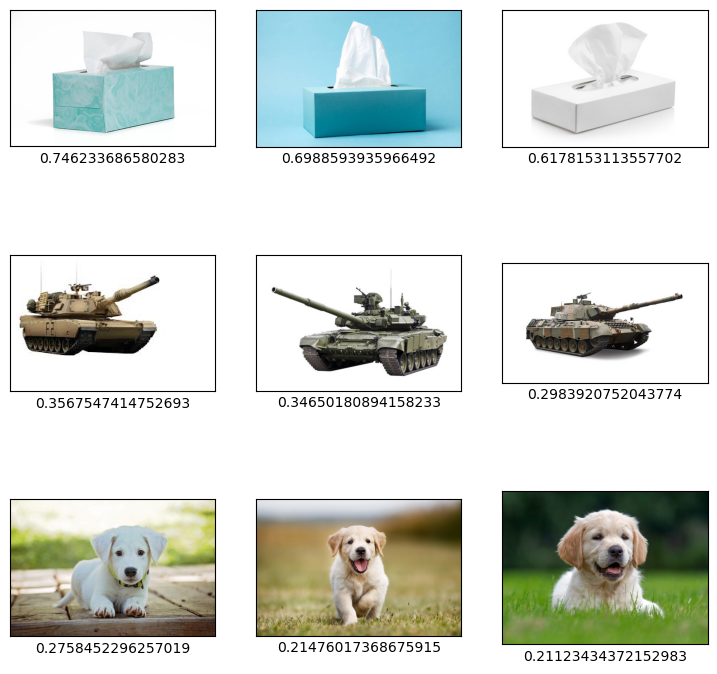

In [ ]:
INPUT_PATH="./360_F_70710568_a7pD2LlcjvDaFYQSQeqvVaSsDfEw2n2T.jpg"
# INPUT_PATH="./dog-5357794_1280.jpg"
search_image(INPUT_PATH, vgg16, features_data, name_data, DATA_PATH)